In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import pydotplus
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

# 1. Đọc và chia bộ dữ liệu

In [ ]:
# Đọc dữ liệu
data = pd.read_csv('data of CFDST.csv', index_col='No')
data

,L (mm),Do (mm),to (mm),Di (mm),ti (mm),fyo (MPa),fyi (MPa),fc' (MPa),Pu
No,,,,,,,,,
1,230,75.4,1.29,62.7,1.23,486.0,470.0,46.2,348.0
2,230,75.2,1.19,62.4,1.20,486.0,470.0,46.2,348.0
3,230,76.3,1.78,62.0,1.00,486.0,470.0,46.2,395.0
4,230,76.3,1.74,62.0,0.94,512.0,470.0,46.2,395.0
5,230,81.5,1.11,62.7,1.14,524.0,470.0,46.2,386.0
...,...,...,...,...,...,...,...,...,...
163,570,190.1,4.21,59.3,3.30,336.8,342.1,37.5,2121.0
164,570,189.7,5.12,59.5,3.32,346.9,342.1,37.5,2473.0
165,570,188.8,5.08,59.5,3.31,346.9,342.1,37.5,2457.0


In [ ]:
# Chia thành input và output:
input_data = data.iloc[:, :-1]
output_data = data.iloc[:, -1]
input_data, output_data

(     L (mm)  Do (mm)  to (mm)  Di (mm)  ti (mm)  fyo (MPa)  fyi (MPa)  fc' (MPa)
 No                                                                              
 1       230     75.4     1.29     62.7     1.23      486.0      470.0       46.2
 2       230     75.2     1.19     62.4     1.20      486.0      470.0       46.2
 3       230     76.3     1.78     62.0     1.00      486.0      470.0       46.2
 4       230     76.3     1.74     62.0     0.94      512.0      470.0       46.2
 5       230     81.5     1.11     62.7     1.14      524.0      470.0       46.2
 ..      ...      ...      ...      ...      ...        ...        ...        ...
 163     570    190.1     4.21     59.3     3.30      336.8      342.1       37.5
 164     570    189.7     5.12     59.5     3.32      346.9      342.1       37.5
 165     570    188.8     5.08     59.5     3.31      346.9      342.1       37.5
 166     570    189.1     6.77     59.7     3.34      327.3      342.1       37.5
 167     570    

In [ ]:
# Chia thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test

(     L (mm)  Do (mm)  to (mm)  Di (mm)  ti (mm)  fyo (MPa)  fyi (MPa)  fc' (MPa)
 No                                                                              
 137     500    140.0     3.00     58.0     5.00      285.0      290.0      34.30
 61      660    220.0     3.62    159.0     3.62      319.6      319.6      52.70
 56      400    160.0     1.00     75.0     1.00      220.0      220.0      23.60
 148     570    190.7     5.11    101.6     4.03      346.9      345.8      37.50
 31      400    114.3     4.80     48.3     2.90      416.0      425.0      63.40
 ..      ...      ...      ...      ...      ...        ...        ...        ...
 72      998    500.2     4.02    301.6     3.02      366.0      366.0      25.32
 107    2500    152.4     3.00     76.0     2.00      549.0      549.0      21.81
 15      230    114.3     1.64     63.5     1.12      262.0      216.0      46.20
 93     1001    139.2     3.00     76.0     2.00      418.0      418.0      21.81
 103    1503    

In [ ]:
# Normalize dữ liệu:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train, X_test

(array([[0.08251834, 0.1226808 , 0.38996764, ..., 0.23255814, 0.24709302,
         0.32085561],
        [0.13141809, 0.27413858, 0.49029126, ..., 0.33313953, 0.33313953,
         0.6993007 ],
        [0.05195599, 0.16054525, 0.06634304, ..., 0.04360465, 0.04360465,
         0.10078157],
        ...,
        [0.        , 0.07402499, 0.16990291, ..., 0.16569767, 0.03197674,
         0.56561086],
        [0.2356357 , 0.12116622, 0.38996764, ..., 0.61918605, 0.61918605,
         0.06396545],
        [0.38905868, 0.14615676, 0.38996764, ..., 1.        , 1.        ,
         0.06396545]]),
 array([[0.38722494, 0.14615676, 0.38996764, 0.11548913, 0.27777778,
         1.        , 1.        , 0.06396545],
        [0.23502445, 0.17020068, 0.38996764, 0.11548913, 0.27777778,
         0.90406977, 0.90406977, 0.06396545],
        [0.23624694, 0.99791746, 0.55501618, 1.00163043, 0.46360153,
         0.46802326, 0.46802326, 0.13615796],
        [0.05195599, 0.16054525, 0.14724919, 0.11277174, 0.18199

# 2. Khai báo mô hình machine learning

# Thông số của mô hình Decision Tree

Các tham số của mô hình **Decision Tree** trong `sklearn.tree.DecisionTreeRegressor`:

## 1. `criterion='squared_error'`
- Tiêu chí đánh giá mức độ tốt của việc chia nhánh.
- `'squared_error'` (mặc định) tính tổng bình phương sai số (MSE), được sử dụng phổ biến trong bài toán hồi quy.

## 2. `splitter='best'`
- Quy tắc lựa chọn cách chia nhánh.
- `'best'`: Chia theo tiêu chí tối ưu nhất.
- `'random'`: Chọn ngẫu nhiên một số cách chia và lấy cách tốt nhất trong số đó.

## 3. `max_depth=None`
- Giới hạn độ sâu tối đa của cây.
- `None` (mặc định) cho phép cây phát triển đến khi tất cả lá chỉ chứa một mẫu hoặc không thể chia nhỏ hơn nữa.

## 4. `min_samples_split=2`
- Số lượng mẫu tối thiểu cần có để một nút có thể tách thêm.
- `2` (mặc định) nghĩa là một nút chỉ tách khi có ít nhất 2 mẫu.

## 5. `min_samples_leaf=1`
- Số lượng mẫu tối thiểu mà một lá phải chứa.
- `1` (mặc định) nghĩa là mỗi lá có thể chỉ chứa 1 mẫu dữ liệu.

## 6. `min_weight_fraction_leaf=0.0`
- Giống `min_samples_leaf` nhưng xét theo tỷ lệ tổng trọng số mẫu.
- `0.0` nghĩa là không áp dụng ràng buộc này.

## 7. `max_features=None`
- Số lượng đặc trưng tối đa được xem xét khi chia một nút.
- `None` (mặc định) dùng tất cả các đặc trưng.

## 8. `random_state=None`
- Xác định seed cho tính ngẫu nhiên của thuật toán.
- `None` nghĩa là không cố định kết quả.

## 9. `max_leaf_nodes=None`
- Số lá tối đa của cây.
- `None` (mặc định) nghĩa là không giới hạn số lá.

## 10. `min_impurity_decrease=0.0`
- Điều kiện dừng sớm dựa trên mức độ giảm độ nhiễu (`impurity`).
- `0.0` nghĩa là không áp dụng điều kiện này.

## 11. `ccp_alpha=0.0`
- Hệ số chi phí phạt cho việc cắt tỉa cây (Cost Complexity Pruning).
- `0.0` nghĩa là không cắt tỉa cây.

## 12. `monotonic_cst=None`
- Giới hạn đơn điệu trên các đặc trưng (áp dụng khi có ràng buộc đơn điệu).
- `None` nghĩa là không áp dụng ràng buộc.





In [ ]:
decisiontree = DecisionTreeRegressor(max_depth=5, max_features=8, min_samples_split=2)
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)

In [ ]:
# Đánh giá bằng các metric
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse_train = root_mean_squared_error(y_train, decisiontree.predict(X_train))
mae_train = mean_absolute_error(y_train, decisiontree.predict(X_train))
r2_train = r2_score(y_train, decisiontree.predict(X_train))
print("Train:")
print("Root Mean Squared Error:", rmse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared:", r2_train)
print("Test:")
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Train:
Root Mean Squared Error: 190.55100153977352
Mean Absolute Error: 113.99973371781883
R-squared: 0.9721107712957614
Test:
Root Mean Squared Error: 217.09510831840873
Mean Absolute Error: 144.69099182868416
R-squared: 0.970222202834768


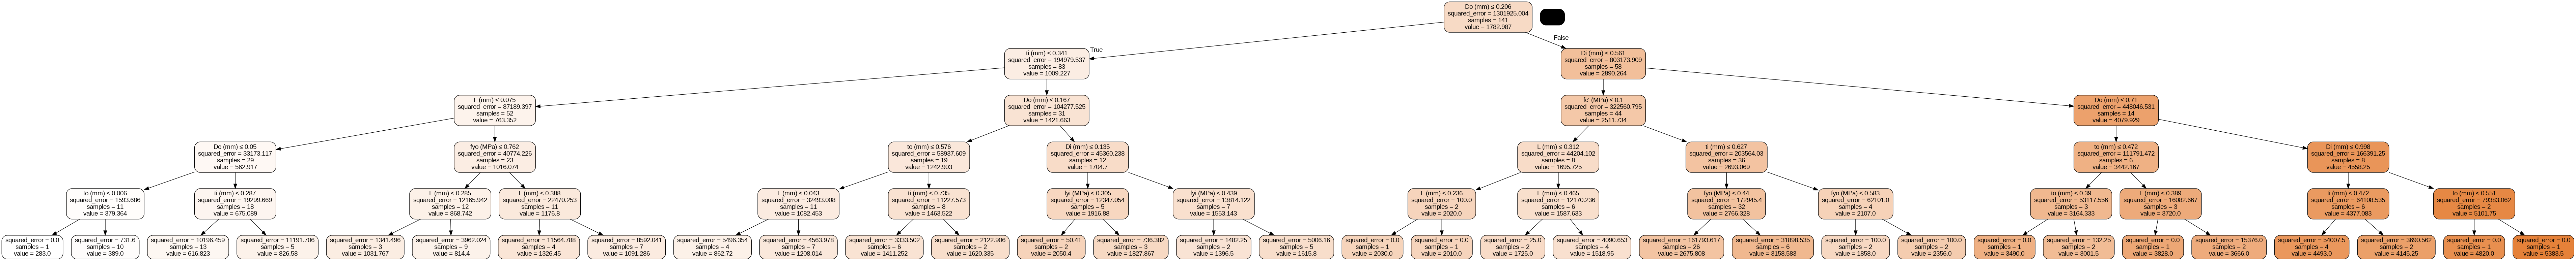

In [ ]:
from sklearn import tree

dot_data = tree.export_graphviz(decisiontree, out_file=None, feature_names=input_data.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(dot_data) # Show graph

Image(graph.create_png())

# 3. Chia lại train-validation-test

In [ ]:


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
import pydotplus
from IPython.display import Image

# 1. Đọc và chia bộ dữ liệu
# Đọc dữ liệu
data = pd.read_csv('data of CFDST.csv', index_col='No')

# Chia thành input và output:
input_data = data.iloc[:, :-1]
output_data = data.iloc[:, -1]

# Chia thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.15, random_state=42)

# Normalize dữ liệu:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 2. Khai báo mô hình machine learning
decisiontree = DecisionTreeRegressor(max_depth=5, max_features=8, min_samples_split=2)

# 3. Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rmse = cross_val_score(decisiontree, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
cv_scores_mae = cross_val_score(decisiontree, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_scores_r2 = cross_val_score(decisiontree, X_train, y_train, cv=kf, scoring='r2')

print("Cross-validation results:")
print("RMSE:", -cv_scores_rmse.mean())
print("MAE:", -cv_scores_mae.mean())
print("R-squared:", cv_scores_r2.mean())

# Train model on the entire training set
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)

# Đánh giá bằng các metric trên tập test
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nTest set results:")
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)




Cross-validation results:
RMSE: 322.15589377369486
MAE: 235.08654178297758
R-squared: 0.9090234775369497

Test set results:
Root Mean Squared Error: 217.919836835821
Mean Absolute Error: 148.07560721329952
R-squared: 0.9699955257174186


In [ ]:
# Lưu scale và model đã huấn luyện
import joblib
joblib.dump(scaler, 'scaler')
joblib.dump(decisiontree, 'decisiontree')

['decisiontree']

In [ ]:
# Load lại scale và model đã huấn luyện
scaler = joblib.load('scaler')
decisiontree = joblib.load('decisiontree')
# dự đoán 1 trường hợp
input_sample = [[400, 114.2, 3, 48.4, 2.8, 430, 425, 63.4]]
input_sample = scaler.transform(input_sample)
print(decisiontree.predict(input_sample))

[1208.01428571]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# 4. Tối ưu các tham số

In [ ]:
!pip install mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 72.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler


# 1. Đọc và chia bộ dữ liệu
# Đọc dữ liệu
data = pd.read_csv('data of CFDST.csv', index_col='No')

# Chia thành input và output:
input_data = data.iloc[:, :-1]
output_data = data.iloc[:, -1]

# Chia thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.15, random_state=42)

# Normalize dữ liệu:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
from mealpy import  FloatVar, GA

def objective_func(x):
    x1 = int(x[0])
    x2 = int(x[1])
    x3 = int(x[2])
    # 2. Khai báo mô hình machine learning
    decisiontree = DecisionTreeRegressor(max_depth=x1, max_features=x2, min_samples_split=x3)

    # 3. Cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores_rmse = cross_val_score(decisiontree, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    return -cv_scores_rmse.mean()
lb = [1,1,2]
ub=[8,8,10]
problem_dict = {
    "obj_func": objective_func,
    "bounds": FloatVar(lb=lb, ub=ub),
    "minmax": "min",
    "save_population": True
}
term_dict = {
    "max_early_stop": 50  # after 30 epochs, if the global best doesn't improve then we stop the program
}
# optimizer = WOA.HI_WOA(epoch=5, pop_size=5, feedback_max = 3)
# optimizer = HBA.OriginalHBA(epoch=5, pop_size=5)

# optimizer = DE.OriginalDE(epoch=100, pop_size=10, cr=0.7, wf=0.5)
optimizer = GA.BaseGA(epoch=100, pop_size=100)
optimizer.solve(problem_dict, termination=term_dict)
print(optimizer.g_best.solution)

# Cài đặt các tham số sau khi đã tối ưu
optimal_model = DecisionTreeRegressor(max_depth=int(optimizer.g_best.solution[0]), max_features=int(optimizer.g_best.solution[1]), min_samples_split=int(optimizer.g_best.solution[2]))
optimal_model.fit(X_train, y_train)
joblib.dump(scaler, 'scaler')
joblib.dump(optimal_model, 'optimal_model')
print(optimizer.g_best.target.fitness)
best_solution = np.array(optimizer.g_best.solution)
np.savetxt('best_solution.csv', best_solution, delimiter=',', comments='')
# optimizer.history.save_global_objectives_chart(filename="goc")
# optimizer.history.save_local_objectives_chart(filename="loc")
# optimizer.history.save_global_best_fitness_chart(filename="gbfc")
# optimizer.history.save_local_best_fitness_chart(filename="lbfc")
# optimizer.history.save_runtime_chart(filename="rtc")
#
# optimizer.history.save_exploration_exploitation_chart(filename="eec")

optimizer.history.save_diversity_chart(filename="dc")
pd.DataFrame(optimizer.history.list_global_best).to_csv('list_global_best.csv')
pd.DataFrame(optimizer.history.list_current_best).to_csv('list_current_best.csv')
pd.DataFrame(optimizer.history.list_global_worst).to_csv('list_global_worst.csv')
pd.DataFrame(optimizer.history.list_current_worst).to_csv('list_current_worst.csv')
pd.DataFrame(optimizer.history.list_epoch_time).to_csv('list_epoch_time.csv')
pd.DataFrame(optimizer.history.list_global_best_fit).to_csv('list_global_best_fit.csv')
pd.DataFrame(optimizer.history.list_current_best_fit).to_csv('list_current_best_fit.csv')
pd.DataFrame(optimizer.history.list_diversity).to_csv('list_diversity.csv')
pd.DataFrame(optimizer.history.list_exploitation).to_csv('list_exploitation.csv')
pd.DataFrame(optimizer.history.list_exploration).to_csv('list_exploration.csv')
pd.DataFrame(optimizer.history.list_population).to_csv('list_population.csv')

INFO:mealpy.evolutionary_based.GA.BaseGA:Solving single objective optimization problem.
INFO:mealpy.evolutionary_based.GA.BaseGA:>>>Problem: P, Epoch: 1, Current best: 267.6105092943561, Global best: 267.6105092943561, Runtime: 1.51583 seconds
INFO:mealpy.evolutionary_based.GA.BaseGA:>>>Problem: P, Epoch: 2, Current best: 271.39343309123467, Global best: 267.6105092943561, Runtime: 1.94764 seconds
INFO:mealpy.evolutionary_based.GA.BaseGA:>>>Problem: P, Epoch: 3, Current best: 257.9242194215307, Global best: 257.9242194215307, Runtime: 2.36172 seconds
INFO:mealpy.evolutionary_based.GA.BaseGA:>>>Problem: P, Epoch: 4, Current best: 258.92062873247977, Global best: 257.9242194215307, Runtime: 1.61842 seconds
INFO:mealpy.evolutionary_based.GA.BaseGA:>>>Problem: P, Epoch: 5, Current best: 261.7344354458195, Global best: 257.9242194215307, Runtime: 1.53995 seconds
INFO:mealpy.evolutionary_based.GA.BaseGA:>>>Problem: P, Epoch: 6, Current best: 268.03874129864806, Global best: 257.9242194215307

[7.72224046 6.32071001 7.22156899]
251.68543057207927


In [ ]:
# Load lại scale và model đã huấn luyện
scaler = joblib.load('scaler')
decisiontree = joblib.load('optimal_model')

# Dự đoán tập train và test
y_pred_train = decisiontree.predict(X_train)
y_pred_test = decisiontree.predict(X_test)

# đánh giá bằng metric
rmse_train = root_mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Train:")
print("Root Mean Squared Error:", rmse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared:", r2_train)

rmse_test = root_mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Test:")
print("Root Mean Squared Error:", rmse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared:", r2_test)

Train:
Root Mean Squared Error: 148.02683152301475
Mean Absolute Error: 98.49628166160082
R-squared: 0.9831695813613348
Test:
Root Mean Squared Error: 190.2726988737589
Mean Absolute Error: 133.34714285714279
R-squared: 0.9771258245267143


In [ ]:

# Lưu kết quả dự đoán thành file csv

# Tạo DataFrame cho train
df_train = pd.DataFrame(scaler.inverse_transform(X_train), columns=input_data.columns)
df_train['y_train'] = y_train.values
df_train['y_pred_train'] = y_pred_train
df_train.to_csv('train_results.csv', index=False)

# Tạo DataFrame cho test
df_test = pd.DataFrame(scaler.inverse_transform(X_test), columns=input_data.columns)
df_test['y_test'] = y_test.values
df_test['y_pred_test'] = y_pred_test
df_test.to_csv('test_results.csv', index=False)
